In [1]:
from mpl_toolkits.basemap import Basemap

In [2]:
import matplotlib.pyplot as plt

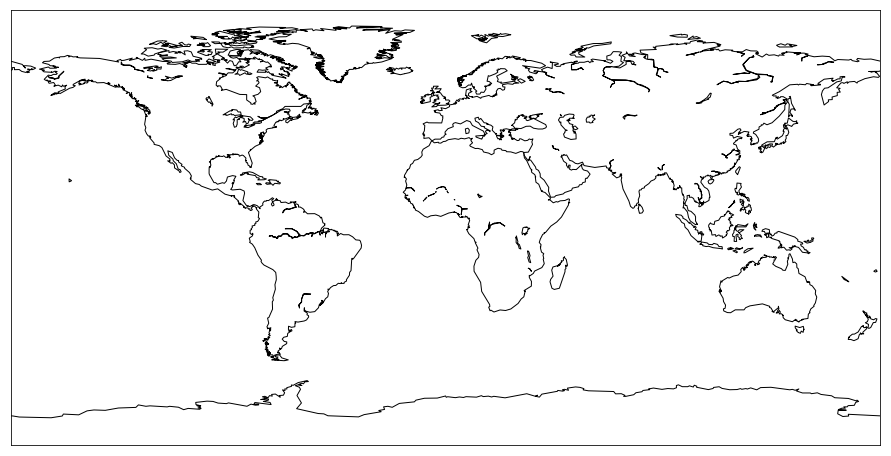

In [3]:
plt.figure(figsize=(16,8))

# 创建Basemap对象
map = Basemap()

# 画出海岸线
map.drawcoastlines()

plt.show()
#plt.savefig('world.png')

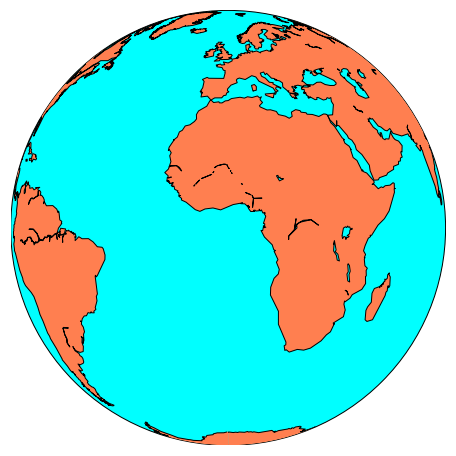

In [4]:
plt.figure(figsize=(16,8))

map = Basemap(projection = 'ortho', lat_0 = 0, lon_0 = 0)

# 首先给地球涂上蓝色的一层
map.drawmapboundary(fill_color = 'aqua')

# 再给大陆涂上屎黄色,给江河湖泊涂上大海一样的颜色
map.fillcontinents(color = 'coral', lake_color = 'aqua')

map.drawcoastlines()

plt.show()

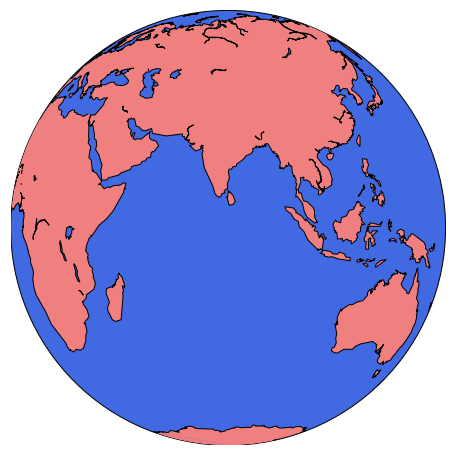

In [5]:
plt.figure(figsize=(16,8))

map = Basemap(projection = 'ortho', lat_0 = 0, lon_0 = 80)

# 首先给地球涂上蓝色的一层
map.drawmapboundary(fill_color = 'RoyalBlue')

# 再给大陆涂上屎黄色,给江河湖泊涂上大海一样的颜色
map.fillcontinents(color = 'LightCoral', lake_color = 'RoyalBlue')

map.drawcoastlines()

plt.show()

## 管理地图投影

所有的地图都应该设置投影模式，在创建 Basemap 对象时要指定投影模式以及相关属性。设置的方法和别的库文件有很大的不同，理解到这一点对后面使用 Basemap 很重要。

### 投影模式

projection 参数用来设置投影模式

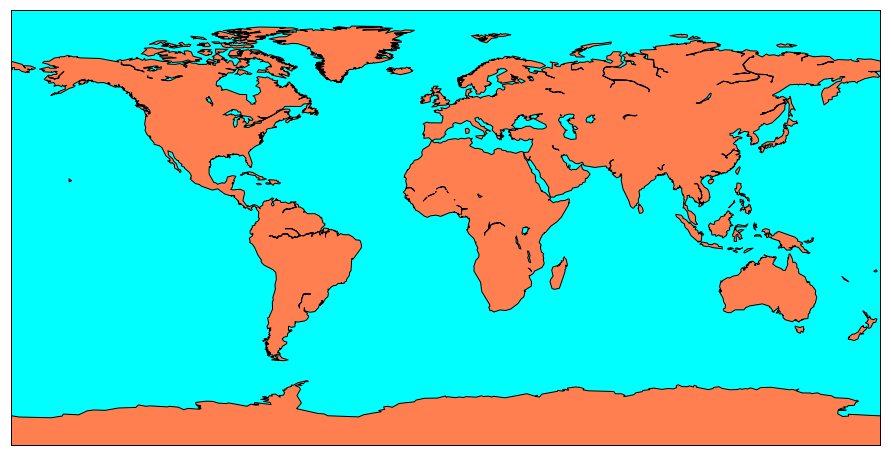

In [6]:
plt.figure(figsize=(16,8))

map = Basemap(projection = 'cyl')

map.drawmapboundary(fill_color = 'aqua')
map.fillcontinents(color = 'coral', lake_color = 'aqua')
map.drawcoastlines()

plt.show()

projection 默认值是 cyl，是 Cylindrical Equidistant projection（等距圆柱投影）的缩写，也叫作等距柱状投影图（Equirectangular projection）或方格投影（Plate carree）

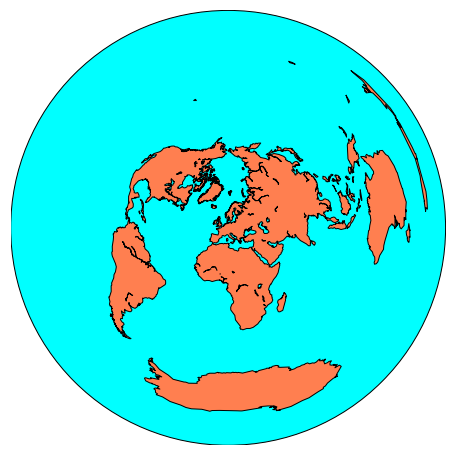

In [7]:
plt.figure(figsize=(16,8))

map = Basemap(projection = 'aeqd', lon_0 = 10, lat_0 = 50)

map.drawmapboundary(fill_color = 'aqua')
map.fillcontinents(color = 'coral', lake_color = 'aqua')
map.drawcoastlines()

plt.show()

#### 下面的例子是用UTM投影显示祖国宝岛台湾省

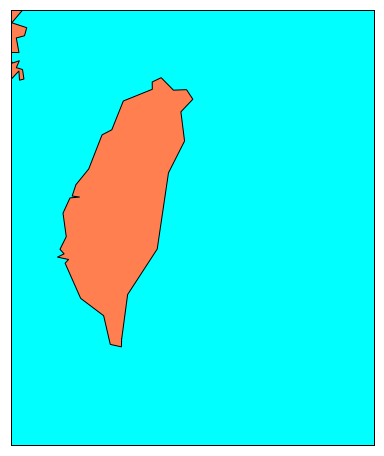

In [8]:
plt.figure(figsize=(16,8))

# boundary resolution must be one of 'c','l','i','h' or 'f'
# gshhs_c.dat
map = Basemap(llcrnrlon = 119.3, llcrnrlat = 20.7, urcrnrlon = 124.6, urcrnrlat = 26, resolution = 'l', epsg = 3415)

map.drawmapboundary(fill_color = 'aqua')
map.fillcontinents(color = 'coral', lake_color = 'aqua')
map.drawcoastlines()

plt.show()

注意：使用cyl、merc、mill、cea和agll投影时，如果没有设置边界，那么边界默认设置为-180，-90,180,90（也就是整个球体），其他投影都需要额外设置。

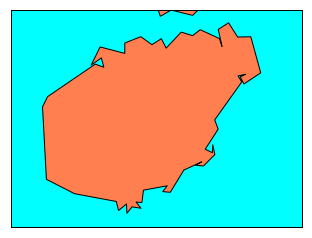

In [12]:
map = Basemap(llcrnrlon = 108.3, llcrnrlat = 18, urcrnrlon = 111.5, urcrnrlat = 20.3, 
              resolution = 'l', projection = 'tmerc', lat_0 = 20, lon_0 = 111)

map.drawmapboundary(fill_color = 'aqua')
map.fillcontinents(color = 'coral', lake_color = 'aqua')
map.drawcoastlines()

plt.show()

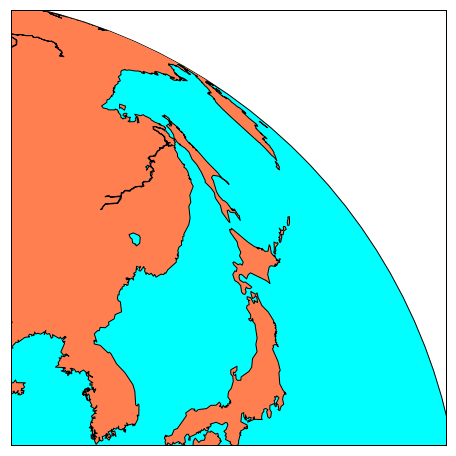

In [13]:
plt.figure(figsize=(16,8))

map = Basemap(resolution = 'l', satellite_height = 3000000., projection = 'nsper', 
              lat_0 = 30, lon_0 = 116, llcrnrx = 500000., llcrnry = 500000., urcrnrx = 2700000., urcrnry = 2700000.)

map.drawmapboundary(fill_color = 'aqua')
map.fillcontinents(color = 'coral', lake_color = 'aqua')
map.drawcoastlines()

plt.show()

在一些投影中（类似于卫星图像），使用地图坐标设置extension参数。projection参数必须设置（四个角的位置），然后显示球体的某一个区域。

### 通过中心坐标和长度、宽度

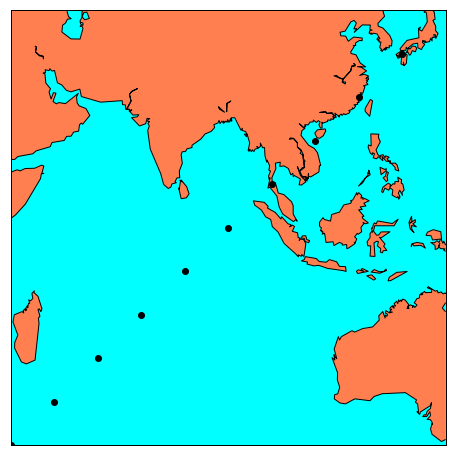

In [21]:
plt.figure(figsize=(16,8))

map = Basemap(projection = 'aeqd', lat_0 = 0, lon_0 = 90, width = 10000000., height = 10000000.)

map.drawmapboundary(fill_color = 'aqua')
map.fillcontinents(color = 'coral', lake_color = 'aqua')
map.drawcoastlines()

for i in range(0, 10000000, 1000000):
    map.plot(i, i, marker = 'o', color = 'k')
    
plt.show()

在这个例子中，投影的中心、宽度和长度作为projection的参数传入。中心点坐标就是经纬度的坐标值，但是长和宽就有点复杂了。
长度的单位是米，(0, 0)是左下角，(width, height)是右下角。所以这里说的原点不像GDAL中定义的那样，在这种投影里面，只定义区域的大小，不定义原点坐标。

## 基本函数

### 在地图上画一个点

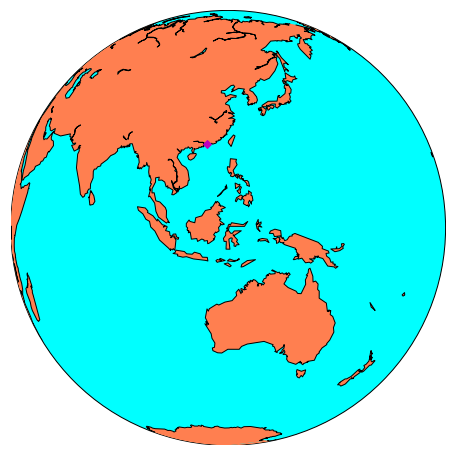

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

map = Basemap(projection = 'ortho', lat_0 = 0, lon_0 = 120, width = 10000000., height = 10000000.)

map.drawmapboundary(fill_color = 'aqua')
map.fillcontinents(color = 'coral', lake_color = 'aqua')
map.drawcoastlines()

# x是经度，y是纬度
x, y = map(114, 22.6)
map.plot(x, y, marker = 'D', color = 'm')

plt.show()

通过上面代码，我们在中国的南海边画了一个圈。。。

- 用经纬度计算地图坐标的时候

  如果latlon关键字设置为true，x、y将被当作经纬度。
  
  
- plot方法绘制点时需要这一点在地图上的坐标，marker和color参数如下：

  - 默认marker是一个点，详细属性在这里：<http://matplotlib.org/api/markers_api.html>
  - 默认color是黑色（k），详细属性在这里：<http://matplotlib.org/api/colors_api.html>



### 绘制多个点

如果要绘制的不止一个点，那就用scatter方法吧。把一系列的点的坐标放在一个数组然后把它传递到plot方法里，就能画出一系列点，还能用线段把它们连起来

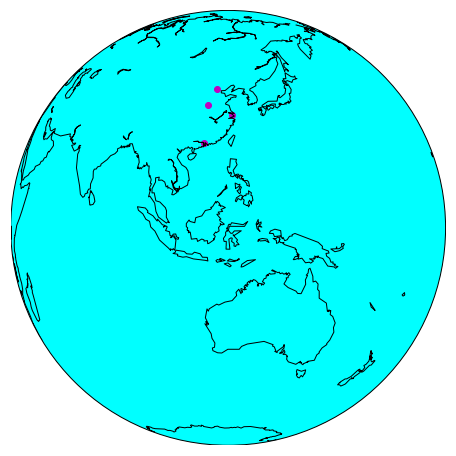

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

map = Basemap(projection = 'ortho', lat_0 = 0, lon_0 = 120, width = 10000000., height = 10000000.)

map.drawmapboundary(fill_color = 'aqua')
#map.fillcontinents(color = 'coral', lake_color = 'aqua')
map.drawcoastlines()

# 北上广郑四个城市
lons = [113.14, 113.40, 121.29, 116.24]
lats = [ 23.08,  34.46,  31.14,  39.55]

# x是经度，y是纬度
x, y = map(lons, lats)
#map.plot(x, y, marker = 'D', color = 'm')
map.scatter(x, y, marker = 'o', color = 'm')

plt.show()

如果使用 map.fillcontinents()，那么填充的颜色会覆盖掉这四个点。

### 绘制栅格数据

有两个方法可以处理栅格数据，一个是contour/contourf，用来绘制或者填充轮廓；一个是pcolor/pcolormesh，用来创造一个虚拟色彩的点。

In [40]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from osgeo import gdal
from numpy import linspace
from numpy import meshgrid

map = Basemap(projection = 'tmerc', lat_0 = 0, lon_0 = 3, 
              llcrnrlon = 1.8197, llcrnrlat = 41.5838, urcrnrlon = 1.8415, urcrnrlat = 41.5986)

ds = gdal.Open

ModuleNotFoundError: No module named 'osgeo'

缺少gdal包的解决办法：

<https://stackoverflow.com/questions/27116402/python-gdal-undefined-symbol-gdalrasterbandgetvirtualmem>

首先找到libgdal.so文件的位置，一般放在ananconda的lib目录，然后在环境变量文件中加入：

```
export LD_PRELOAD=~/anaconda2/lib/libgdal.so
```

加载后即可。